In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
url = 'Mall_Customers.csv'
user_data = pd.read_csv(url)

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
user_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
new_data = user_data[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
#Rename column
new_data = new_data.rename(columns={'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_core'})

In [13]:
new_data.head(5)

,annual_income,spending_core
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


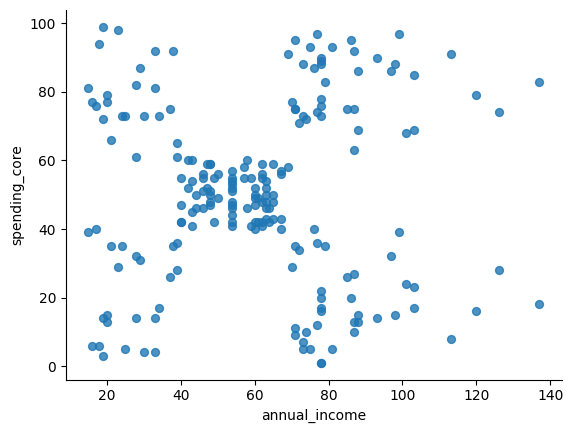

In [15]:
from matplotlib import pyplot as plt
new_data.plot(kind='scatter', x='annual_income', y='spending_core', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
from sklearn.cluster import KMeans

In [19]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters = i,
              init = 'k-means++',
              n_init = 10,
              max_iter = 200, #Maximum number of iterations of the k-means algorithm to run
              random_state=0
              )
  km.fit(new_data)
  distortions.append(km.inertia_)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmea

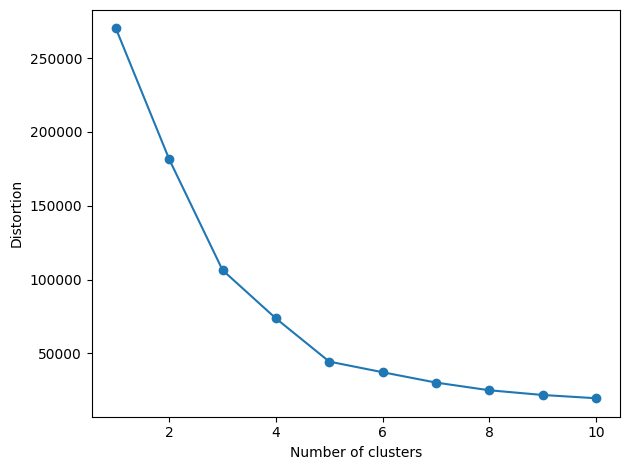

In [21]:
#Visualize
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [23]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [25]:
kms = KMeans(n_clusters = 5,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol= 1e-04,
            random_state = 0)
y_kms = kms.fit_predict(new_data)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


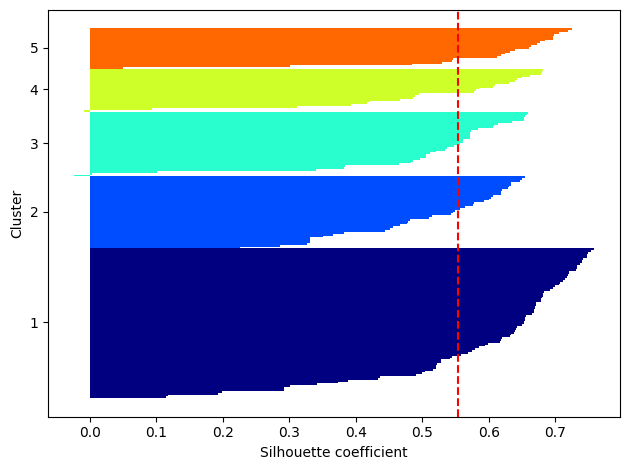

In [27]:
cluster_labels = np.unique(y_kms)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    new_data, y_kms, metric = 'euclidean'
)
y_ax_lower, y_ax_upper = 0,0

yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_kms == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


In [29]:
kms6 = KMeans(n_clusters = 6,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol= 1e-04,
            random_state = 0)
y_kms6 = kms6.fit_predict(new_data)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


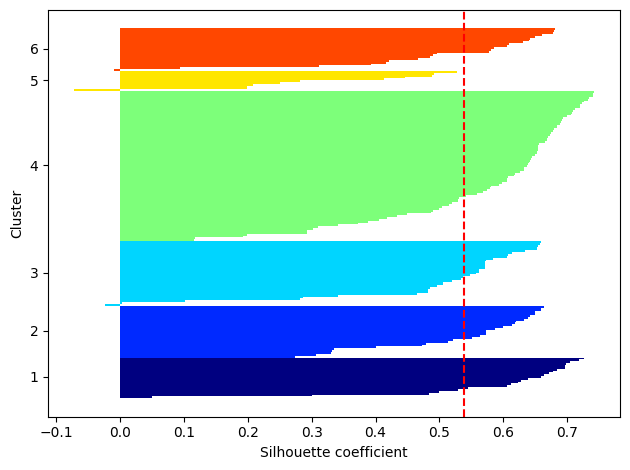

In [31]:
cluster_labels6 = np.unique(y_kms6)
n_clusters6 = cluster_labels6.shape[0]
silhouette_vals = silhouette_samples(
    new_data, y_kms6, metric = 'euclidean'
)
y_ax_lower, y_ax_upper = 0,0

yticks = []
for i, c in enumerate(cluster_labels6):
  c_silhouette_vals = silhouette_vals[y_kms6 == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters6)
  plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels6 + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [33]:
kmplus = KMeans(n_clusters = 6,
                init = 'k-means++',
                n_init=10,
                max_iter=300,
                tol= 1e-04,
                random_state =0)
y_kmplus = kmplus.fit_predict(new_data)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\DELL\AppData\Local\Temp\ipykernel_33580\2913276927.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_data.loc[y_kmplus == 3, 'annual_income'],


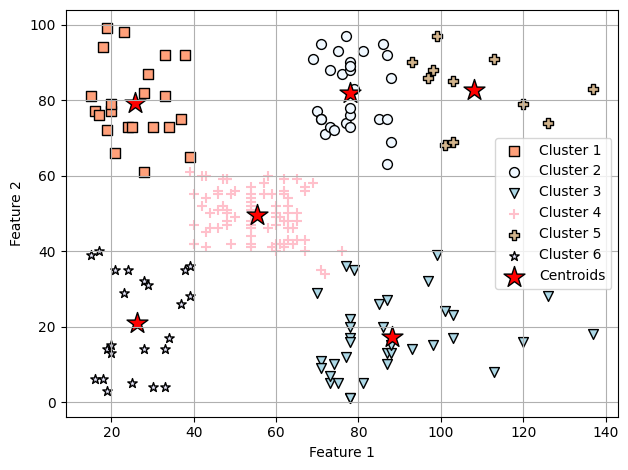

In [35]:
plt.scatter(new_data.loc[y_kmplus == 0, 'annual_income'],
            new_data.loc[y_kmplus == 0, 'spending_core'],
            s=50, c='lightsalmon',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(new_data.loc[y_kmplus == 1, 'annual_income'],
            new_data.loc[y_kmplus == 1, 'spending_core'],
            s=50, c='aliceblue',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(new_data.loc[y_kmplus == 2, 'annual_income'],
            new_data.loc[y_kmplus == 2, 'spending_core'],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(new_data.loc[y_kmplus == 3, 'annual_income'],
            new_data.loc[y_kmplus == 3, 'spending_core'],
            s=50, c='pink',
            marker='+', edgecolor='black',
            label='Cluster 4')
plt.scatter(new_data.loc[y_kmplus == 4, 'annual_income'],
            new_data.loc[y_kmplus == 4, 'spending_core'],
            s=50, c='tan',
            marker='P', edgecolor='black',
            label='Cluster 5')
plt.scatter(new_data.loc[y_kmplus == 5, 'annual_income'], # Changed to y_kmplus == 5 for Cluster 6
            new_data.loc[y_kmplus == 5, 'spending_core'], # Changed to y_kmplus == 5 for Cluster 6
            s=50, c='lavender',
            marker='*', edgecolor='black',
            label='Cluster 6')
plt.scatter(kmplus.cluster_centers_[:, 0],
            kmplus.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# Load dataset (example: Mall Customers)
df = pd.read_csv('Mall_Customers.csv')

# Optional: drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)


# Select features (can customize)
X = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Suppose you have actual labels (e.g., Segment labels)
# For demonstration, let's say you have:
# y_true = [known labels here]  <-- Replace with actual label column from data

# Let's simulate (only for demonstration)
# y_true = [some array with same size as X_scaled]  
# Example: assume we have target labels as dummy (you must replace it with actual ones)
# y_true = df['Segment']  # Only if available

# Matching cluster labels with true labels using mode
def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(np.max(y_pred) + 1):
        mask = (y_pred == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(y_true[mask])[0]
    return labels

# If y_true available:
# y_pred_mapped = map_clusters_to_labels(np.array(y_true), clusters)
# acc = accuracy_score(y_true, y_pred_mapped)
# print("Accuracy:", acc)

# If no labels:
print("Clustering done. No accuracy since no ground-truth labels.")


Clustering done. No accuracy since no ground-truth labels.


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
